# Zastosowanie optymalizatora
### Tymoteusz Trętowicz, 260451

In [2]:
from scipy import optimize
import datetime
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import requests



start_date = datetime.date.fromisoformat("2022-01-01")
end_date = datetime.date.fromisoformat("2022-04-01")

web_address = "http://api.nbp.pl/api/exchangerates/tables/A/%s/%s/?format=json" % (start_date, end_date)
dataset_file = "exchangerates_%s_%s.json" % (start_date, end_date)

## Dane
Pobieramy dane używając api strony Narodowego Banku Polskiego. Dane to wartości walut w przeliczeniu na PLN, od 1 stycznia 2022, do 1 kwietnia 2022.

In [4]:
if not os.path.isfile(dataset_file):
    response = requests.get(web_address)
    
    with open(dataset_file, 'w') as outfile:
        json.dump([{
            'date': element['effectiveDate'],
            **{rate['code']: rate['mid'] for rate in element['rates']}
        } for element in response.json()], outfile)
    outfile.close()

data_input = open(dataset_file, 'r')
df = pd.read_json(data_input)
df['date'] = pd.DatetimeIndex(df['date'])
df.set_index('date', inplace = True)
df

,THB,USD,AUD,HKD,CAD,NZD,SGD,EUR,HUF,CHF,...,MXN,ZAR,BRL,MYR,RUB,IDR,INR,KRW,CNY,XDR
date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,0.1219,4.0424,2.9329,0.5185,3.1881,2.7617,2.9958,4.5889,0.012482,4.4326,...,0.1969,0.2554,0.7256,0.9688,0.0544,0.000283,0.054428,0.003388,0.6357,5.6787
2022-01-04,0.1216,4.0468,2.9185,0.5191,3.1750,2.7505,2.9859,4.5737,0.012515,4.4090,...,0.1970,0.2535,0.7122,0.9668,0.0540,0.000283,0.054278,0.003382,0.6349,5.6430
2022-01-05,0.1219,4.0396,2.9274,0.5184,3.1775,2.7501,2.9797,4.5672,0.012627,4.4106,...,0.1973,0.2539,0.7115,0.9633,0.0533,0.000281,0.054328,0.003372,0.6343,5.6551
2022-01-07,0.1198,4.0279,2.8823,0.5164,3.1683,2.7196,2.9640,4.5576,0.012683,4.3720,...,0.1973,0.2574,0.7087,0.9570,0.0532,0.000281,0.054220,0.003347,0.6318,5.6327
2022-01-10,0.1191,4.0064,2.8802,0.5139,3.1734,2.7124,2.9567,4.5377,0.012679,4.3500,...,0.1962,0.2565,0.7111,0.9539,0.0535,0.000280,0.054107,0.003347,0.6286,5.6156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-28,0.1267,4.2784,3.2215,0.5464,3.4267,2.9719,3.1434,4.7020,0.012600,4.5697,...,0.2137,0.2948,0.9019,1.0145,NaN,0.000298,0.056168,0.003493,0.6716,5.8953
2022-03-29,0.1272,4.2917,3.2109,0.5482,3.4303,2.9525,3.1513,4.7144,0.012655,4.5809,...,0.2136,0.2922,0.9005,1.0176,NaN,0.000299,0.056384,0.003517,0.6735,5.9146
2022-03-30,0.1252,4.1688,3.1321,0.5326,3.3403,2.9071,3.0810,4.6507,0.012667,4.5045,...,0.2093,0.2884,0.8762,0.9915,NaN,0.000291,0.054983,0.003447,0.6566,5.7814


### Wybór danych
Dane, na których będziemy pracować to wartość funtów Brytyjskich i euro w przeliczeniu na PLN.

In [5]:
Y = df['GBP'].values
X = df['EUR'].values
print(X)
print(Y)

[4.5889 4.5737 4.5672 4.5576 4.5377 4.5454 4.5332 4.527  4.5372 4.5201
 4.5275 4.5279 4.5201 4.5303 4.5358 4.5821 4.592  4.5713 4.5697 4.5982
 4.582  4.55   4.5439 4.5459 4.555  4.5274 4.5167 4.4879 4.5163 4.5743
 4.5091 4.4916 4.5088 4.5256 4.5193 4.5416 4.5352 4.6284 4.6608 4.6909
 4.7241 4.7989 4.7931 4.8363 4.9647 4.9121 4.8429 4.8013 4.7924 4.7465
 4.7311 4.7055 4.6876 4.7221 4.693  4.6975 4.7036 4.7589 4.7459 4.702
 4.7144 4.6507 4.6525 4.6428]
[5.4643 5.4677 5.4658 5.4595 5.4406 5.458  5.4345 5.4209 5.4387 5.4123
 5.4144 5.4357 5.4279 5.421  5.4169 5.4731 5.4958 5.4818 5.4934 5.532
 5.492  5.4556 5.4598 5.381  5.3893 5.3792 5.3633 5.3225 5.3772 5.4645
 5.3856 5.3542 5.3988 5.4222 5.4227 5.4482 5.4333 5.546  5.5751 5.6131
 5.6593 5.7631 5.7881 5.8413 6.0211 5.9196 5.8051 5.7264 5.7127 5.6375
 5.6056 5.5931 5.5865 5.6109 5.5819 5.6322 5.6574 5.7061 5.6769 5.6311
 5.605  5.4775 5.4842 5.5114]


## Funkcje pomocnicze
#### Model liniowy

In [6]:
def model(parametry, x):
  a, b = parametry
  return a*x + b

#### Błąd średniokwadratowy

In [7]:
def mean_squared_error(params):
    err = 0
    for i in range(0, X.size):
        err += (Y[i] - model(params, X[i])) ** 2
    return err / X.size

#### Wizualizacja 2D

In [8]:
def plot2D(Func, x_history, range_imp):

    x_start, x_opt = x_history[0], x_history[-1]

    axis_x1 = np.linspace(range_imp[0], range_imp[1], num=100)
    axis_x2 = np.linspace(range_imp[2], range_imp[3], num=100)
    mesh_x1, mesh_x2 = np.meshgrid(axis_x1, axis_x2)
    macierz_Z = Func([mesh_x1, mesh_x2])

    fig, ax = plt.subplots(figsize=(8,8))
    cplot = ax.contourf(mesh_x1, mesh_x2, macierz_Z, 10, cmap='Spectral_r', alpha=1)
    clines = ax.contour(mesh_x1, mesh_x2, macierz_Z, 10, colors='black')

    for punkt in x_history:
        ax.plot(                                                                                       \
            punkt[0], punkt[1],                                                                        \
            'o', color='white', markeredgecolor='black', markersize=5, alpha=0.7                       \
        )

    ax.plot(                                                                                           \
        x_start[0], x_start[1],                                                                        \
        'd', color='gray', markeredgecolor='black', markersize=10, alpha=0.7                           \
    )
 
    ax.plot(                                                                                           \
        x_opt[0], x_opt[1],                                                                            \
        'h', color='white', markeredgecolor='black', markersize=15                                     \
    )

    ax.set_aspect('equal')
    ax.set_xlabel('a', fontsize=16)
    ax.set_ylabel('b', fontsize=16)
    ax.clabel(clines)
    fig.colorbar(cplot)

    return fig, ax

#### Wizualizacja 3D

In [9]:
def plot3D(Func, range_imp):
    axis_x1 = np.linspace(range_imp[0], range_imp[1], 50)
    axis_x2 = np.linspace(range_imp[2], range_imp[3], 50)
    mesh_x1, mesh_x2 = np.meshgrid(axis_x1, axis_x2)
    _, ax = plt.subplots(figsize=(7,7), subplot_kw={'projection':'3d'})
    ax.plot_surface(mesh_x1, mesh_x2, Func([mesh_x1, mesh_x2]), cmap='Spectral_r')

    ax.set_xlabel('$a$', fontsize=14)
    ax.set_ylabel('$b$', fontsize=14)
    ax.set_zlabel('$MSE$', fontsize=14)
    plt.show()

#### Wybór losowego punktu

In [10]:
def random_point(origin, spread):
    return np.random.normal(loc=origin, scale=spread, size=2)

#### Implementacja eksperymentu

In [11]:
def run_experiment(origin, spread):
    x_zero = random_point(origin, spread)
    print('Punkt startowy: (', str(round(x_zero[0], 4)), ', ', str(round(x_zero[1], 4)), ')') 

    x_opt, x_history = optimize.fmin(
        mean_squared_error, 
        x_zero, 
        disp=False,
        retall=True
    )

    print('a =', round(x_opt[0], 4))
    print('b =', round(x_opt[1], 4))
    print('Błąd dla a i b:', round(mean_squared_error(x_opt), 2))
    m = x_zero.max() if x_zero.max() != 0 else 1
    range = [-10 *m, 10*m, 10*m, -10*m]
    # range = [-10 + x_zero[0], 10 + x_zero[0], 10 + x_zero[1], -10 + x_zero[1]]
    plot2D(mean_squared_error, x_history, range)
    plt.show()
    plot3D(mean_squared_error, range)
    
    # rysujemy linię na tle punktów
    X_test = np.linspace(start = X.min(), stop = X.max(), num = 300)
    Y_pred = model(parametry = [x_opt[0], x_opt[1]], x = X_test)
    plt.figure(figsize=(12, 10))
    plt.scatter(X,Y)
    plt.plot(X_test, Y_pred, color = 'tab:orange')
    plt.xlabel('x - EUR w PLN', fontsize = 14)
    plt.ylabel('y - GBP w PLN', fontsize = 14)
    plt.title('Model liniowy - szukanie minimalnego błędu', size = 20)
    plt.show()

Celem jest znalezienie optymalnych parametrów $a$ i $b$ prostej $y = ax + b$\
Tutaj $y$ jest wartością funta brytyjskiego w PLN, a $x$ wartością euro w PLN.

Błąd średniokwadratowy zależny od paramtrów $a$ i $b$ jest dany wzorem:
$$\tau(a, b) = \frac{1}{n} \sum_{i = 1}^{n} \left( y_i - \overline{y} \right)^2 $$

Eksperyment polegać ma na wyborze losowego punktu startowego $P_s = (a, b)$. Następnie użyjemy implementacji metody Neldera-Meada `optimize.fmin()`, do znalezienia współrzędnych $a$ i $b$ minimializujących średniokwadratowy błąd aproksymacji $\tau$. \
Eksperyment będzie powtórzony trzykrotnie. 

### Eksperyment \#1
Punkt startowy do pierwszego eksperymentu pochodzi z rozkładu normalnego, o odchyleniu standardowym $= 5$, oraz centrum w punkcie $P = (0,0)$.

Punkt startowy: ( -5.0365 ,  -1.5145 )
a = 1.2562
b = -0.2804
Błąd dla a i b: 0.0


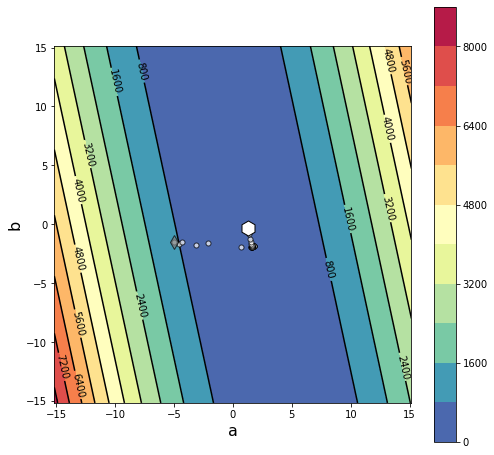

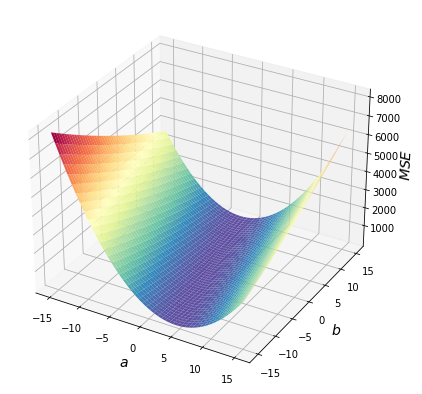

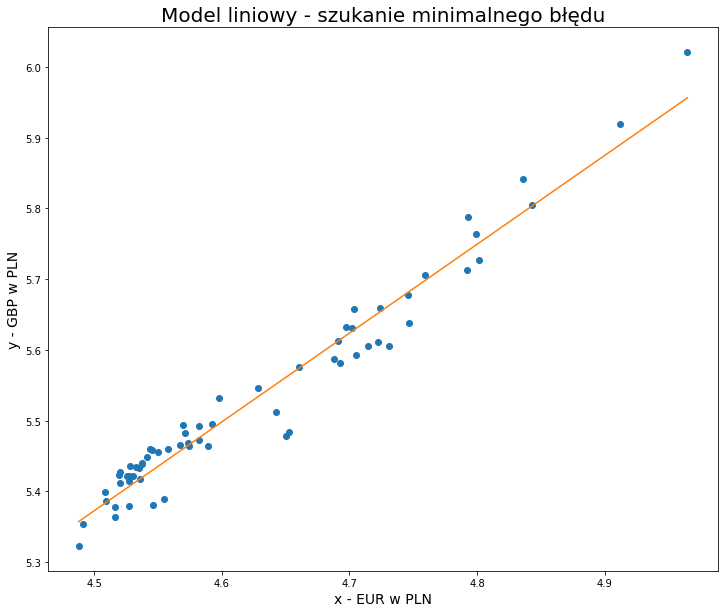

In [12]:
run_experiment((0,0), 5)

### Eksperyment \#2
Punkt startowy do pierwszego eksperymentu pochodzi z rozkładu normalnego, o odchyleniu standardowym $= 100$, oraz centrum w punkcie $P = (10,-10)$.

Punkt startowy: ( 4.0895 ,  107.4926 )
a = 1.2562
b = -0.2804
Błąd dla a i b: 0.0


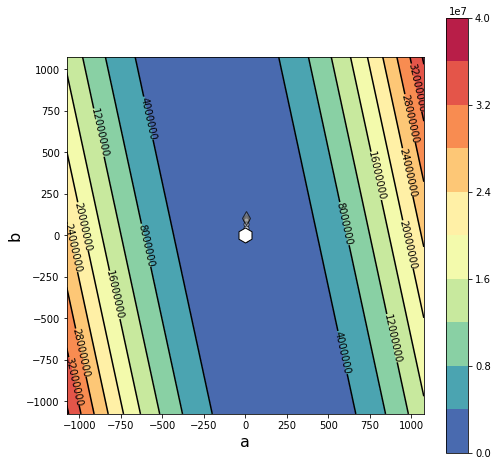

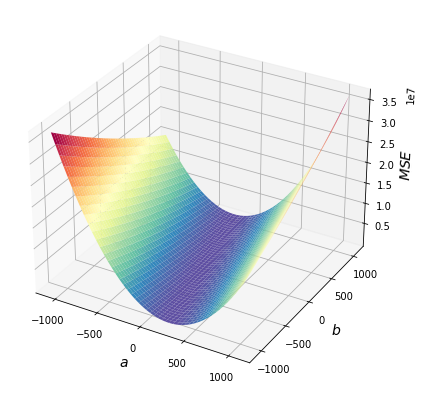

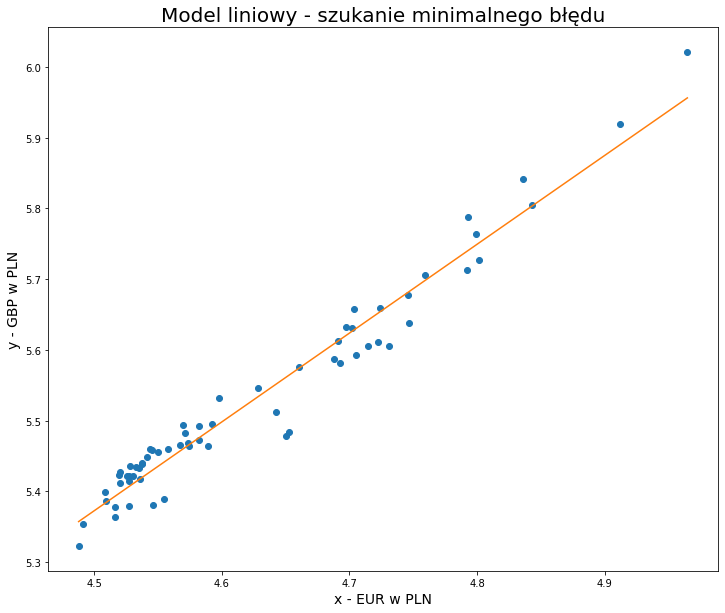

In [13]:
run_experiment((10,-10), 100)

### Eksperyment \#2
Punkt startowy do pierwszego eksperymentu pochodzi z rozkładu normalnego, o odchyleniu standardowym $= 1000$, oraz centrum w punkcie $P = (100,100)$.

Punkt startowy: ( 1855.2086 ,  -178.9074 )
a = 1.2562
b = -0.2805
Błąd dla a i b: 0.0


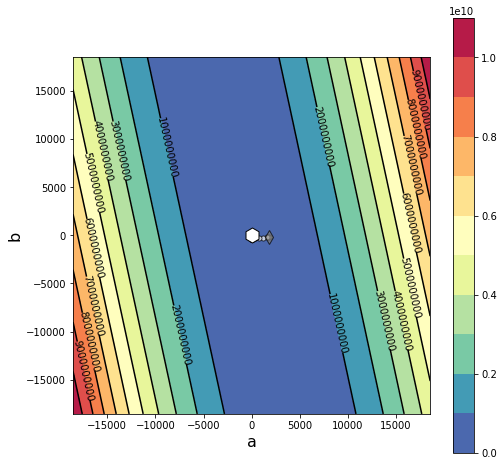

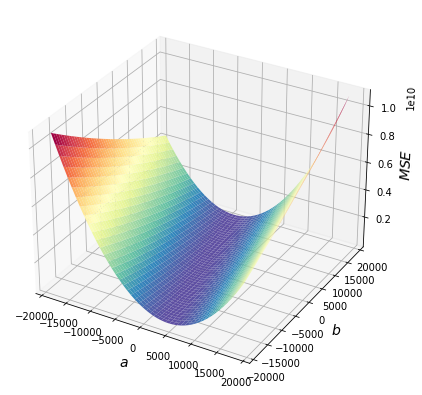

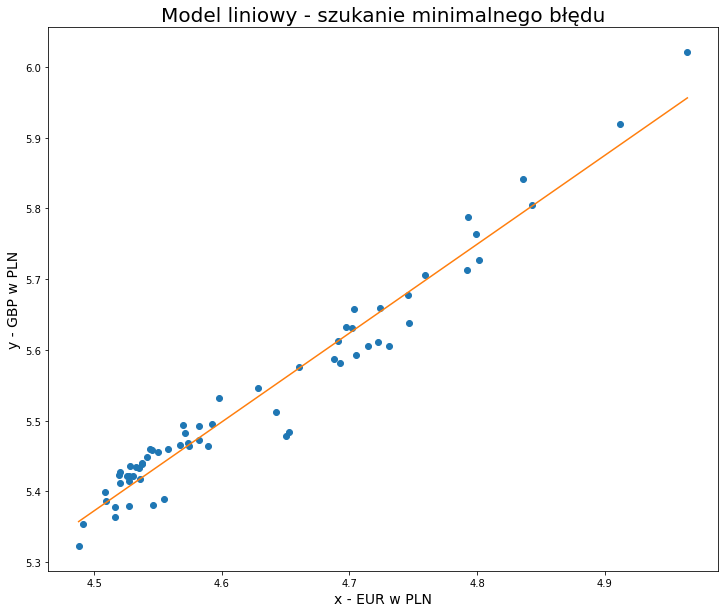

In [14]:
run_experiment((100,100), 1000)

### Wnioski
Eksperyment polegający na wyborze losowego punktu startowego został przeprowadzony trzykrotnie. Punkty pochodziły z ze zebiorów o normalnych dystrybucjach, z różnymi wartościami odchylenia startowego oraz różnymi wartościami median.

Dla danych użytych w eksperymantach $a$ i $b$ zbiegają do tych samych wartości, niezależnie od wyboru punktu startowego. Wartości te, to: $a = 1.2562$ oraz $b = -0.2804$

Oznacza to, że dla tych danych funkcja błędu $\tau$ ma jedno optimum globalne, do którego dąży metoda Neldera-Meada. Wizualziacja 3D przedstawia tę funkcję jako paraboloidę, co potwierdza wnioski.